### Twitter Sentiment Analysis

In this project I have done analysis on Twitter Sentiment  Data. The data is taken from http://cs.stanford.edu

<img src='img.png' width=80% />

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
columns = ['sentiment','id', 'date', 'query', 'user','text']

df = pd.read_csv('training.1600000.processed.noemoticon.csv',names = columns,encoding = "ISO-8859-1")

In [4]:
df.head(10)

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

###### There are 1.6 million of tweets.

.8 Million Negetive reviews (with label 0)
.8 Million Positive reviews (with label 4)

So the data is perfectly balanced. 

For this project I need just the text column and the sentiment columns for my analysis

In [6]:
df = df[['sentiment', 'text']]

In [7]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

Great there are no NULL columns in my data

In [8]:
##Lets look at the length of the twitter text

df['pre_length'] = [len(comments) for comments in df['text']]

In [9]:
print('Maximum Length',df['pre_length'].max())
print('Minimum Length',df['pre_length'].min())

print('Mean Length   ', df['pre_length'].mean())
print('Mode Length   ',df['pre_length'].mode())

Maximum Length 374
Minimum Length 6
Mean Length    74.09011125
Mode Length    0    138
dtype: int64


In [10]:
df['pre_length'].describe(percentiles = [0.05, .25, .5, .75, .95, .98, .99])

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
5%       2.200000e+01
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
95%      1.360000e+02
98%      1.380000e+02
99%      1.410000e+02
max      3.740000e+02
Name: pre_length, dtype: float64

In [11]:
df[df['pre_length'] > 141].count()

sentiment     13580
text          13580
pre_length    13580
dtype: int64

98%-99% of twitter text is of length <= 138-141

1% of the twitter text data is long

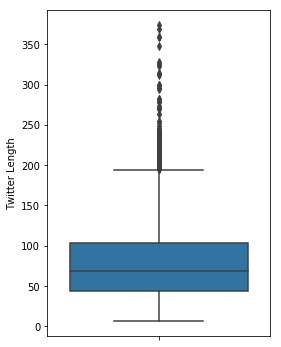

In [12]:
fig, ax = plt.subplots(figsize = (4,6))
sns.boxplot(y=df['pre_length'])
plt.ylabel('Twitter Length')
plt.show()

In [13]:
## Lets see some of the long twitter comments 

In [14]:
df[(df['pre_length'] > 141) & (df['sentiment'] == 0)].head(15)

,sentiment,text,pre_length
213,0,Awwh babs... you look so sad underneith that s...,142
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
1071,0,Used the term &quot;Fail Whale&quot; to a clie...,148
1380,0,"@Craftysince1990 Lol, that's sweet! I bought t...",144
1704,0,@ktml I think its iTunes fault I cant download...,145
1745,0,I am layin in bed @ 3am cos my tummy is beatbo...,147


In [15]:
df[(df['pre_length'] > 141) & (df['sentiment'] == 4)].head(15)

,sentiment,text,pre_length
800014,4,@LutheranLucciol Make sure you DM me if you po...,144
800103,4,Just seen the preview for the movie &quot;Obse...,145
800174,4,@ninasplayground I agree. My kids got &quot;W...,148
800228,4,&quot;City of Ember&quot; was AWESOME!!! SO ha...,148
800252,4,Please?: http://eluts.com/frontstore/Item/ite...,150
800255,4,"@markhoppus hey mark, i want to know if the so...",147
800261,4,Awwh babs... you look so sad underneith that s...,142
800315,4,Giant Drag &quot;Wicked Game&quot; ? http://tw...,152
800333,4,@JonathanRKnight Glad to hear that you had suc...,142
800377,4,@robgokeemusic I know - I should have made som...,142


In [16]:
df.iloc[145]['text']

"@twista202 I still haven't read the 9th&amp;10th Princess diaries  Saving Francesca made me cry at the end. Hmm those are easy books."

In [17]:
## We see the HTMLtags are not converted correctely. We see &amp in the text.

## Lets use BeautifulSoup for to resolve this

In [18]:
from bs4 import BeautifulSoup

comments= [BeautifulSoup(comment,'lxml').get_text() for comment in df['text']]


KeyboardInterrupt: 

In [ ]:


import re

text = re.sub(r'@[A-za-z0-9]+',' ', str(df['text1']))

In [ ]:
df['text']= text

In [ ]:


text= re.sub(r'https?://[a-zA-Z0-9./]+', ' ', str(df['text']))

df['text']= text

In [ ]:
#!pip3 install nltk

In [ ]:
#import nltk
#nltk.download('punkt')
#from nltk.tokenize import word_tokenize

In [19]:
import re
import contractions


def clean_tweets(text):
    ## remove the @ mentions in the tweets 
    pattern1 = r'@[A-za-z0-9_]+'
    ## remove http links from the twitter comments
    pattern2 = r'https?://[a-zA-Z0-9./]+'
    ##remove the www pattern without httpprefix
    pattern3 = r'www.[^ ]+'
    ## remove all other than letters
    pattern4 = r'[^a-zA-Z]'
    ## extra spaces
    pattern5 =r' +'
    ##  1st cleaning
    clean_text = BeautifulSoup(text,'lxml')
    clean_text = clean_text.get_text()
    
    try:
        clean_text = clean_text.decode("utf-8-sig").replace(u'\ufffd','?')
    except:
        clean_text = clean_text
    ##expand the contractions
    clean_text = contractions.fix(clean_text)  ## for example He's flying becomes he is flying
    ## remove the @ mentions in the tweets 
    clean_text = re.sub(pattern1, ' ', clean_text)
    ## remove http links from the twitter comments
    clean_text = re.sub(pattern2, ' ', clean_text)
    ## remove www links from the twitter comments
    clean_text = re.sub(pattern3, ' ', clean_text)
    ## remove all other than letters
    clean_text = re.sub(pattern4, ' ', clean_text)
    ##convert to lower case
    clean_text = clean_text.lower()
    ##remove extra lines and tabs
    clean_text = clean_text.translate(clean_text.maketrans('\n\t\r', '   '))
    ## remove extra spaces
    clean_text = re.sub(pattern5,' ', clean_text)

    
    return clean_text


In [4]:
from tqdm import tqdm_notebook

In [21]:
tweets =[]
for comment in tqdm_notebook(df['text']):
    tweets.append(clean_tweets(comment))


C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\bs4\__init__.py:272: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [22]:
tweets[1]

'is upset that he cannot update his facebook by texting it and might cry as a result school today also blah '

In [23]:
clean_tweet_df = pd.DataFrame(tweets,columns = ['text'])
clean_tweet_df['label'] = df['sentiment']
clean_tweet_df.head()

,text,label
0,awww that is a bummer you shoulda got david c...,0
1,is upset that he cannot update his facebook by...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all i m mad why am i...,0


In [24]:
##Save the clean tweets

In [25]:
clean_tweet_df.to_csv('clean_tweets.csv', encoding = 'utf-8',index= False)
clean_tweet_df = None
df = pd.read_csv('clean_tweets.csv')
df.head()

,text,label
0,awww that is a bummer you shoulda got david c...,0
1,is upset that he cannot update his facebook by...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all i m mad why am i...,0


## Load Clean Tweets

In [26]:
df = pd.read_csv('clean_tweets.csv')
df.head()

,text,label
0,awww that is a bummer you shoulda got david c...,0
1,is upset that he cannot update his facebook by...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all i m mad why am i...,0


In [27]:
##now smileys are getting converted into one letter word. wE WILL TAKE CARE OF IT

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text     1600000 non-null object
label    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [29]:
df['length'] = [len(comments) for comments in df['text']]

In [30]:
df['length'].describe(percentiles = [0.01,0.05, .25, .5, .75, .95, .98, .99])

count    1.600000e+06
mean     6.412658e+01
std      3.433729e+01
min      1.000000e+00
1%       8.000000e+00
5%       1.600000e+01
25%      3.600000e+01
50%      5.900000e+01
75%      9.100000e+01
95%      1.240000e+02
98%      1.310000e+02
99%      1.330000e+02
max      1.670000e+02
Name: length, dtype: float64

In [31]:
df[df['length']==1].count()

text      3749
label     3749
length    3749
dtype: int64

In [32]:
df[(df['length']==1) & (df['text']==' ')].count()

text      3749
label     3749
length    3749
dtype: int64

There are 2 things that I have noticed here 

1> There are 3749 rows with text as Spaces 

2> There are lot of rows with one charecter data...This would mean something like :D, ;D etc are reduced to just d.
    This problem is there for many rows and not just rows with one length
    
    
Lets fix it

In [33]:
#!pip install nltk

In [37]:
from nltk.tokenize import word_tokenize


In [67]:
## strip removes the text if the text is only blanks
##lstrip removes the leading spaces in the string
def upd_clean_tweets(text):
    words = [ word for word in word_tokenize(text) if len(word) > 1]
    return ((" ").join(words)).strip()

In [68]:
word_tokenize('I am doing good!')

['I', 'am', 'doing', 'good', '!']

In [69]:
upd_clean_tweets('I am doing good!   ')

'am doing good'

In [70]:
tweets = []
for comments in tqdm_notebook(df['text']):
    tweets.append(upd_clean_tweets(comments))

KeyboardInterrupt: 

In [43]:
df['text']= tweets
df['text'].head()

0    awww that is bummer you shoulda got david carr...
1    is upset that he can not update his facebook b...
2    dived many times for the ball managed to save ...
3       my whole body feels itchy and like its on fire
4    no it is not behaving at all mad why am here b...
Name: text, dtype: object

In [44]:
df['length'] = [len(comments) for comments in df['text']]

In [45]:
df['length'].describe()

count    1.600000e+06
mean     6.080306e+01
std      3.340833e+01
min      0.000000e+00
25%      3.300000e+01
50%      5.600000e+01
75%      8.700000e+01
max      1.590000e+02
Name: length, dtype: float64

Thats perfect....I see the minimum length now is 0.0

In [46]:
df[df['length']==1].count()

text      0
label     0
length    0
dtype: int64

In [47]:
##Those data points with text of length 1 is also gone...wonderful

In [48]:
df= df[df['length']>1]



In [49]:
## Now all the text with 0 length is dropped.So the minimum length of the tweets is 2
df['length'].describe()

count    1.596059e+06
mean     6.095320e+01
std      3.331248e+01
min      2.000000e+00
25%      3.300000e+01
50%      5.600000e+01
75%      8.700000e+01
max      1.590000e+02
Name: length, dtype: float64

In [50]:
df.head()

,text,label,length
0,awww that is bummer you shoulda got david carr...,0,68
1,is upset that he can not update his facebook b...,0,105
2,dived many times for the ball managed to save ...,0,71
3,my whole body feels itchy and like its on fire,0,46
4,no it is not behaving at all mad why am here b...,0,83


In [51]:
len(df) ## SO we have aroung 3.5K data points

1596059

In [52]:
df.to_csv('clean_tweets_upd.csv', encoding = 'utf-8',index= False,columns = ['text', 'label'])

## Clean Tweet Load

In [71]:
##
df =pd.read_csv('clean_tweets_upd.csv')
df.head()

,text,label
0,awww that is bummer you shoulda got david carr...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all mad why am here b...,0


In [73]:
df.loc[1]['text']

'is upset that he can not update his facebook by texting it and might cry as result school today also blah'

In [74]:
df['text'][0]

'awww that is bummer you shoulda got david carr of third day to do it'

In [75]:
#import nltk
#nltk.download('wordnet')

In [76]:
# Installing wordcloud
#!pip install wordcloud

In [58]:
from wordcloud import WordCloud, STOPWORDS

In [59]:
neg_tweets = ' '.join([comment for comment  in df[df['label']==0]['text']])
pos_tweets = ' '.join([comment for comment  in df[df['label']==4]['text']])

In [60]:
wc = WordCloud(background_color = 'white', max_words = 80,
              stopwords = STOPWORDS)

<function matplotlib.pyplot.show(*args, **kw)>

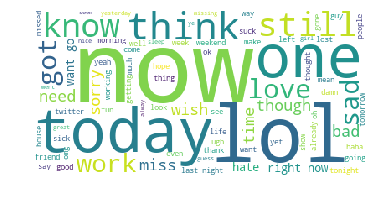

In [61]:
## Negative Comment Visualization

plt.imshow(wc.generate(neg_tweets))
plt.axis('off')
plt.show

I see words like need,miss,sorry,bad,wish

<function matplotlib.pyplot.show(*args, **kw)>

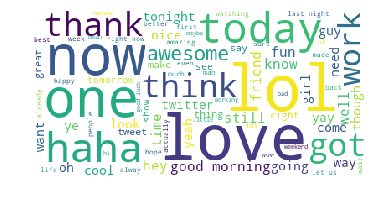

In [62]:
## Positive Comment Visualization

plt.imshow(wc.generate(pos_tweets))
plt.axis('off')
plt.show

I see words like fun,nice, yay,awesome, great

Today,now,work,lol seems to be present in both Positive and Negetive comments

We will see later how to deal with it in case our algorithm is not working well

In [113]:
##
#from sklearn.utils import shuffle

#df = shuffle(df)

In [147]:
#train_ratio = .85
#idx = int(len(df)*train_ratio)

#df_train = df[:idx]
#df_valid = df[idx:]


In [148]:
#print('Count of total Dataset      : ',len(df))

#print('Count of train Dataset      : ',len(df_train))

#print('Count of validation Dataset : ',len(df_valid))

In [77]:
import gc
gc.collect()


4414

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df['text'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [79]:
len(vectorizer.get_feature_names())

266797

In [80]:
vectorizer.get_feature_names()

## There are some really stupid words that are extracted as features

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaall',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaao',
 'aaaaaaaaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaaaaaaaaaaaaaahrg',
 'aaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaahhhhh',
 'aaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaint',
 'aaa

In [82]:
neg_doc = vectorizer.transform(df[df['label']==0]['text'])
pos_doc = vectorizer.transform(df[df['label']==4]['text'])

In [83]:
pos_doc.shape

(797858, 266797)

In [87]:
neg_tf = np.sum(neg_doc, axis =0)
pos_tf = np.sum(pos_doc, axis =0)

In [88]:
pos_tf.shape

(1, 266797)

In [89]:
# this is to remove the extra dimension
neg =np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [90]:
term_freq = pd.DataFrame([neg,pos], columns = vectorizer.get_feature_names()).transpose()

## Now we have 2 columns negative positive.
## the term frequency for each of the word in both positive and negetive reviews
term_freq.columns =['Negative', 'Positive']
term_freq['total'] = term_freq['Negative']+ term_freq['Positive']
term_freq.head()

,Negative,Positive,total
aa,160,93,253
aaa,93,54,147
aaaa,45,29,74
aaaaa,26,12,38
aaaaaa,16,12,28


In [91]:
term_freq.sort_values(by = 'total', ascending = False).head(20)

,Negative,Positive,total
to,344213,272482,616695
the,258026,266159,524185
is,202770,180263,383033
you,129248,232588,361836
not,242072,105225,347297
my,190776,125956,316732
it,157520,147891,305411
and,153959,149647,303606
in,115542,101163,216705
for,99004,117369,216373


In [92]:
term_freq.sort_values(by = 'total', ascending = False).tail(5)

,Negative,Positive,total
innabit,1,0,1
innaface,1,0,1
innagual,0,1,1
innaloo,0,1,1
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,1,0,1


In [93]:
## There are some really junk words in the corpus and countVectorizer is taking them as features. NOT GOOD

In [94]:
term_freq.to_csv('term_freq.csv', encoding = 'utf-8')

In [95]:
## Start from here 

term_freq = None
term_freq = pd.read_csv('term_freq.csv')
term_freq.set_index('Unnamed: 0',inplace = True)
term_freq.head()

,Negative,Positive,total
Unnamed: 0,,,
aa,160,93,253
aaa,93,54,147
aaaa,45,29,74
aaaaa,26,12,38
aaaaaa,16,12,28


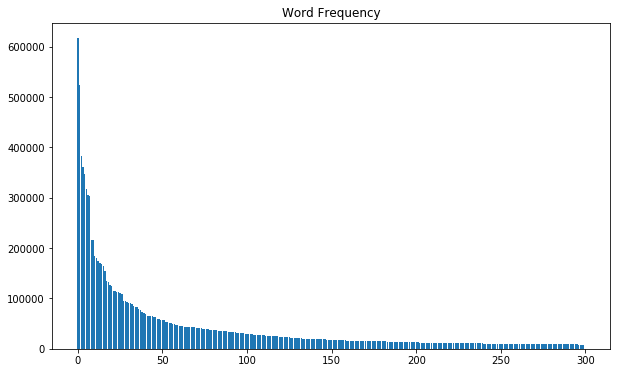

In [96]:
words_count = 300

words = np.arange(words_count)
plt.figure(figsize = (10,6))
plt.bar(x=words,height =term_freq.sort_values(by = 'total',ascending = False)['total'][:words_count])

plt.title('Word Frequency')
plt.show()

In [97]:
import warnings
warnings.filterwarnings("ignore")

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

## Here I am extracting the most important 5000 features
vectorizer = CountVectorizer(stop_words = STOPWORDS,max_features = 5000)
vectorizer.fit(df['text'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'but', 'com', 'ourselves', 'over', 'your', 'our', "don't", 'that', 'the', 'up', 'doing', 'you', 'so', 'they', 'am', 'we', "you'll", "didn't", 'or', "i'd", 'i', 'few', 'nor', 'be', "we'll", "when's", 'also', 'has', 'some', 'from', "weren't", 'after', 'was', 'itself', 'since', 'this', 'wou...', "she'll", 'there', 'here', "you're", "they've", 'have', 'what', 'about', 'before', 'as', "she'd"},
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [100]:
neg_doc = vectorizer.transform(df[df['label']==0]['text'])
pos_doc = vectorizer.transform(df[df['label']==4]['text'])
neg_tf = np.sum(neg_doc, axis =0)
pos_tf = np.sum(pos_doc, axis =0)
# this is to remove the extra dimension
neg =np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

## Data frame for Term Frequency
term_freq = pd.DataFrame([neg,pos], columns = vectorizer.get_feature_names()).transpose()

## Now we have 2 columns negative positive.
## the term frequency for each of the word in both positive and negetive comments
term_freq.columns =['Negative', 'Positive']
## Add the columns total 
term_freq['total'] = term_freq['Negative']+ term_freq['Positive']


In [101]:
## THis is still lot of bad words in the learned features. So we will correct them using some other ways

In [102]:
len(vectorizer.get_feature_names())

5000

In [103]:
term_freq.sort_values(by = 'Positive',ascending = False).head(10)

,Negative,Positive,total
good,29209,62118,91327
will,50934,57635,108569
day,41276,47964,89240
love,16990,47697,64687
going,49492,43947,93439
now,52619,41379,93998
lol,23123,36119,59242
thanks,5768,34376,40144
got,38713,32027,70740
time,27526,30432,57958


In [104]:
term_freq.sort_values(by = 'Negative',ascending = False).head(10)

,Negative,Positive,total
now,52619,41379,93998
will,50934,57635,108569
going,49492,43947,93439
go,45635,28378,74013
work,45420,19529,64949
want,41756,17123,58879
day,41276,47964,89240
got,38713,32027,70740
today,38118,30101,68219
back,33090,23869,56959


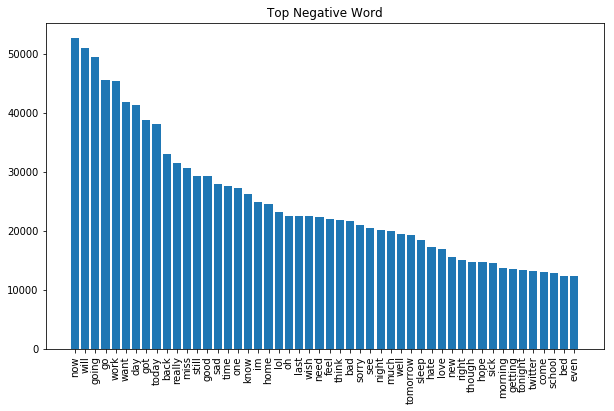

In [105]:
##Top 50 Negative words

words_count = 50

words = np.arange(words_count)
plt.figure(figsize = (10,6))
plt.bar(x=words,height =term_freq.sort_values(by = 'Negative',ascending = False)['Negative'][:words_count])
plt.xticks(ticks = words, labels = term_freq.sort_values(by = 'Negative',ascending = False)['Negative']
           [:words_count].index,rotation = 'vertical')
plt.title('Top Negative Word')
plt.show()

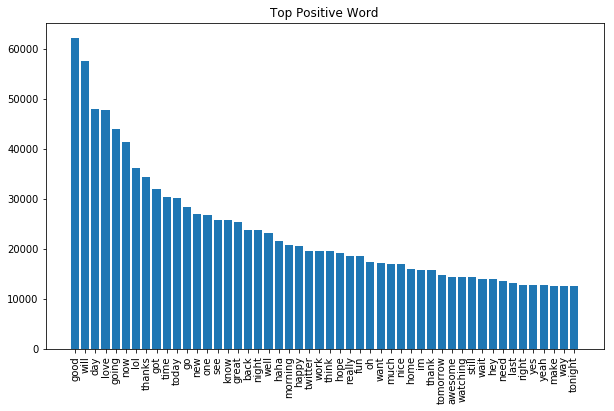

In [106]:
##Top 50 Positive words

words_count = 50

words = np.arange(words_count)
plt.figure(figsize = (10,6))
plt.bar(x=words,height =term_freq.sort_values(by = 'Positive',ascending = False)['Positive'][:words_count])
plt.xticks(ticks = words, labels = term_freq.sort_values(by = 'Positive',ascending = False)['Positive']
           [:words_count].index,rotation = 'vertical')
plt.title('Top Positive Word')
plt.show()

In [107]:
## Some of the words are good features

## However some of the words are used in both positive and negative comments (like will,day)

In [108]:
##Lets look at positive to negetive ratio of the words

term_freq['pos/neg ratio'] = term_freq['Positive']/term_freq['Negative']

In [112]:
term_freq[(term_freq['pos/neg ratio'] > .9) &  (term_freq['pos/neg ratio'] < 1.1)].head(15)

,Negative,Positive,total,pos/neg ratio
aaron,179,169,348,0.944134
absolute,145,137,282,0.944828
according,264,244,508,0.924242
account,1494,1371,2865,0.917671
africa,185,174,359,0.940541
age,541,591,1132,1.092421
ahh,1634,1581,3215,0.967564
ahhh,1354,1254,2608,0.926145
ako,176,167,343,0.948864
alot,979,948,1927,0.968335


In [202]:
## Awesome we are able to filter out some words which doesn't make much contribution to labelling a comment

##We will use it later

In [113]:
term_freq[(term_freq['pos/neg ratio'] < .6) |  (term_freq['pos/neg ratio'] > 1.5)].head(25)

,Negative,Positive,total,pos/neg ratio
aa,160,93,253,0.581250
abandoned,159,41,200,0.257862
able,3886,1581,5467,0.406845
absolutely,875,1415,2290,1.617143
ac,535,185,720,0.345794
accent,108,235,343,2.175926
access,678,240,918,0.353982
accident,750,133,883,0.177333
accidentally,378,94,472,0.248677
accomplished,89,232,321,2.606742


In [114]:
## Now we get some really interesting words that can be helpful

## We really have to do something about this 'aa', 'aah' words....This is just going to ruin my model

Text(0.5, 1.0, 'Frequency Distribution')

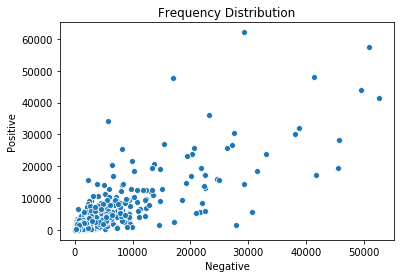

In [115]:
## scatterplot of positive and negative

sns.scatterplot(x = term_freq['Negative'] , y = term_freq['Positive'])
plt.title('Frequency Distribution')

In [117]:
## Positive Frequency percentage

positive_sum = term_freq['Positive'].sum()

term_freq['Positive Freq Pct'] = term_freq['Positive']*1.0/positive_sum

negative_sum = term_freq['Negative'].sum()

term_freq['Negative Freq Pct'] = term_freq['Negative']*1.0/negative_sum

In [118]:
term_freq.sort_values(by = 'Positive Freq Pct', ascending = False).head(10)

,Negative,Positive,total,pos/neg ratio,Positive Freq Pct,Negative Freq Pct
good,29209,62118,91327,2.126673,0.014013,0.006214
will,50934,57635,108569,1.131562,0.013001,0.010837
day,41276,47964,89240,1.162031,0.010820,0.008782
love,16990,47697,64687,2.807357,0.010760,0.003615
going,49492,43947,93439,0.887962,0.009914,0.010530
now,52619,41379,93998,0.786389,0.009334,0.011195
lol,23123,36119,59242,1.562038,0.008148,0.004920
thanks,5768,34376,40144,5.959778,0.007755,0.001227
got,38713,32027,70740,0.827293,0.007225,0.008236
time,27526,30432,57958,1.105573,0.006865,0.005856


In [119]:
## Good love thanks great is part of the top positive percentage

In [120]:
import gc
gc.collect()

32691

# START from here

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
##load clean tweets

##
df =pd.read_csv('clean_tweets_upd.csv')
df.head()

,text,label
0,awww that is bummer you shoulda got david carr...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all mad why am here b...,0


In [30]:
## Update the labels for Positive tweets to 1. In the datset it is 4 for positive and 0 for negative
df['label'] = df['label'].apply(lambda x : 0 if x==0 else 1)

In [31]:
    ##remove repeated characters like wow wowwwwwww, wowwwww
    ##try this -----------------
    ###   s = re.sub(r'(.)\1+', r'\1\1', s) add this at a later point 

In [32]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train,X_valid, y_train,y_valid = train_test_split(X,y,test_size= 0.01, shuffle = True, random_state = 1)

In [33]:
print('No of positive training example    : ', (y_train==1).sum())
print('No of negative training example    : ', (y_train==0).sum())
print('No of positive validation example  : ', (y_valid==1).sum())
print('No of negative validation example  : ', (y_valid==0).sum())

No of positive training example    :  789869
No of negative training example    :  790229
No of positive validation example  :  7989
No of negative validation example  :  7972


In [7]:
## There are more number of negative examples here. So if a classifier predict negative label for all the tweets 
### This is called Zero Rule (ZeroR)

## The best train accuracy would be 50.01 on training set and 50.05 on validation set

##However the no of postive and negative is almost same. So I am not balancing the dataset

In [8]:
##Another baseline is TextBlob Sentiment Classifier


In [9]:
from textblob import TextBlob
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score



In [10]:
result = [TextBlob(i).sentiment.polarity for i in X_valid]

In [11]:
pred = [0 if p <0 else 1 for p in result]

confusion = confusion_matrix(y_valid,pred,labels = [1,0])

In [12]:
confusion = pd.DataFrame(confusion, index=['True positive', 'True negative'],
                         columns=['Pred positive','Pred negative'])
print(confusion)

               Pred positive  Pred negative
True positive           7175            814
True negative           5454           2518


In [13]:
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.76      0.32      0.45      7972
           1       0.57      0.90      0.70      7989

   micro avg       0.61      0.61      0.61     15961
   macro avg       0.66      0.61      0.57     15961
weighted avg       0.66      0.61      0.57     15961



In [14]:
print("Accuracy Score :" , accuracy_score(y_valid, pred))

Accuracy Score : 0.6072927761418457


##### Feature Extraction

In [15]:
##Feature Extraction using Bag of Words Approach

##Bag of words just find if the word is there in that document or not. The words that it checks for are the words that are 
##part of the dictionary.

Dictionary size cant be of unlimited size. We need to restricit to some reasonable size to make it wrk for 
Bag of Words. 

In [16]:
##Lets try out the simplest classification algorithm to check the optimal dictionary size 

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from tqdm import tqdm_notebook

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
def check_classifier_accuracy(pipeline, X_train,y_train,X_valid, y_valid):
    if len(X_valid[y_valid==0]) > len(X_valid[y_valid==1]):
        default_accuracy = float(len(X_valid[y_valid==0]))/len(X_valid)
    else:
        default_accuracy = float(len(X_valid[y_valid==1]))/len(X_valid)
    start_time = time()
    ##print('a')
    sentiment = pipeline.fit(X_train,y_train)
    ##print('b')
    end_time = time() 
    predict = sentiment.predict(X_valid)

    
    classifier_accuracy = accuracy_score(y_valid, predict)
    
    if default_accuracy > classifier_accuracy:
        print('Classifier Accuracy is worse than Default Accuracy by', abs(classifier_accuracy - default_accuracy)*100,'%')
    elif default_accuracy == classifier_accuracy:
        print('Classifier Accuracy and Default Accuracy is same')
    else:
        print('Classifier Accuracy is better than Default Accuracy by', (classifier_accuracy - default_accuracy)*100,'%')
    print('Training time ',(end_time - start_time) )
    
    return classifier_accuracy,(end_time - start_time)



def check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer,no_of_features,classifier,
                           stop_words = None, n_gram = (1,1)):
    comparison = []
    for n in tqdm_notebook(no_of_features,total = len(no_of_features)):
        vectorizer.set_params(stop_words= stop_words, max_features = n,ngram_range = n_gram)
        
        build_pipeline = Pipeline([('vectorizer', vectorizer),
                                   ('classifier',classifier)])
        
        print('\n')
        print('Validation Result for',n,'features')
        
        feature_accuracy, time_taken = check_classifier_accuracy(build_pipeline, X_train,y_train,X_valid, y_valid)
        comparison.append((n,feature_accuracy, time_taken))
    return comparison

In [37]:
no_of_features = np.arange(5000,100001, 5000)
print(len(no_of_features))

20


In [24]:
cvec = CountVectorizer()
lr = LogisticRegression()
no_of_features = np.arange(5000,100001, 5000)

outcome = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = None,n_gram = (1,1))
    



Validation Result for 5000 features
Classifier Accuracy is better than Default Accuracy by 28.444333061838233 %
Training time  91.3567430973053


Validation Result for 10000 features
Classifier Accuracy is better than Default Accuracy by 28.94555478980014 %
Training time  101.01932406425476


Validation Result for 15000 features
Classifier Accuracy is better than Default Accuracy by 29.13977820938538 %
Training time  116.49037075042725


Validation Result for 20000 features
Classifier Accuracy is better than Default Accuracy by 29.352797443769198 %
Training time  137.88916397094727


Validation Result for 25000 features
Classifier Accuracy is better than Default Accuracy by 29.42171543136395 %
Training time  163.4816768169403


Validation Result for 30000 features
Classifier Accuracy is better than Default Accuracy by 29.496898690558236 %
Training time  132.83764958381653


Validation Result for 35000 features
Classifier Accuracy is better than Default Accuracy by 29.46557233256062 %

From the above we see the 50K or 55K Features would be a ideal approach for this problem

In [14]:
term_freq = pd.read_csv('term_freq.csv')
term_freq.set_index('0',inplace = True)
term_freq.sort_values(by = 'total',ascending = False).head(10)

,Negative,Positive,total
0,,,
to,344213,272482,616695
the,258026,266159,524185
is,202770,180263,383033
you,129248,232588,361836
not,242072,105225,347297
my,190776,125956,316732
it,157520,147891,305411
and,153959,149647,303606
in,115542,101163,216705


In [38]:
from sklearn.feature_extraction import text

english_stop_words = text.ENGLISH_STOP_WORDS

In [39]:
custom_stop_words = list(term_freq.sort_values(by = 'total',ascending = False).head(10).index)

In [17]:
#custom_stop_words.append('abcd')
#custom_stop_words.append('efgh')

In [40]:
all_found = True
not_found = []
for word in custom_stop_words:
    if word not in english_stop_words:
        all_found = False
        not_found.append(word)
        
if all_found == True:
    print('All the custome stop words are in the english stop words')
else:
    print('the below words are not included in the english stop wrds')
    print(not_found)

    

All the custome stop words are in the english stop words


In [41]:
stopwords_list = [None, custom_stop_words, english_stop_words]

In [19]:
##Reusing check_classifier accuracy here

#def check_feature_accuracy_based_on_stopword(X_train,y_train,X_valid, y_valid,vectorizer,no_of_features,classifier,
#                           stop_words_list = None, n_gram = (1,1)):
    #comparison = []
    #features =['NONE Stopword', 'Custom Stopwords', 'English Stopwords']
    #for i,stopword in tqdm_notebook(enumerate(stopwords_list),total = len(stopwords_list)):
        #vectorizer.set_params(stop_words= stopword, max_features = no_of_features,ngram_range = n_gram)
        
        #build_pipeline = Pipeline([('vectorizer', vectorizer),
        #                           ('classifier',classifier)])
        
        #print('\n')
        #print('Validation Result for',features[i])
        
       # feature_accuracy, time_taken = check_classifier_accuracy(build_pipeline, X_train,y_train,X_valid, y_valid)
     #   comparison.append((feature_accuracy, time_taken))
  #  return comparison

In [20]:
cvec = CountVectorizer()
lr = LogisticRegression()
no_of_features = np.arange(10000,100001, 10000)

#stopwords_list = [None, custom_stop_words, english_stop_words]

### WITHOUT STOPWORDS

result_without_stopword = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = None,n_gram = (1,1))




Validation Result for 10000 features
Classifier Accuracy is better than Default Accuracy by 28.94555478980014 %
Training time  258.40406703948975


Validation Result for 20000 features
Classifier Accuracy is better than Default Accuracy by 29.352797443769198 %
Training time  369.1434314250946


Validation Result for 30000 features
Classifier Accuracy is better than Default Accuracy by 29.496898690558236 %
Training time  387.8158586025238


Validation Result for 40000 features
Classifier Accuracy is better than Default Accuracy by 29.55328613495396 %
Training time  486.2933831214905


Validation Result for 50000 features
Classifier Accuracy is better than Default Accuracy by 29.60967357934967 %
Training time  517.5896270275116


Validation Result for 60000 features
Classifier Accuracy is better than Default Accuracy by 29.60967357934967 %
Training time  474.7379548549652


Validation Result for 70000 features
Classifier Accuracy is better than Default Accuracy by 29.59714303615062 %
T

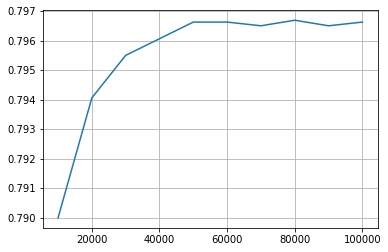

In [23]:
features_plot_without_stopword = pd.DataFrame(result_without_stopword,columns=['features','valid_accuracy','train_time'])
plt.plot(features_plot_without_stopword['features'],features_plot_without_stopword['valid_accuracy'],
        label = 'Without Stopwords')
plt.grid()
plt.show()

In [24]:
features_plot_without_stopword.to_csv('features_plot_without_stopword.csv')

In [ ]:
result_with_english_stopword = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,1))

In [ ]:
result_with_custom_stopword = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = custom_stop_words,n_gram = (1,1))

In [ ]:
## Result with Bigram with Stopwords

result_with_english_stopword_bigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,2))

In [ ]:
## Result with Bigram with Stopwords

result_with_english_stopword_trigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,3))

In [ ]:
## Result with Bigram without Stopwords

result_without_stopword_bigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = None,n_gram = (1,2))

In [ ]:
## Result with Trigram without Stopwords

result_without_stopword_bigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = None,n_gram = (1,3))

In [25]:
## Classifier with best parameter found

cvec = CountVectorizer()
lr = LogisticRegression()

cvec.set_params(stop_words= english_stop_words, max_features = 80000,ngram_range = (1,3))
        
pipeline = Pipeline([('vectorizer', cvec),
                     ('classifier',lr)])

sentiment = pipeline.fit(X_train,y_train)
 
predict = sentiment.predict(X_valid)

print(accuracy_score(y_valid, predict))

0.7763298038969989


In [26]:
confusion = confusion_matrix(y_valid,predict,labels = [1,0])
confusion = pd.DataFrame(confusion, index=['True positive', 'True negative'],
                         columns=['Pred positive','Pred negative'])
print(confusion)

               Pred positive  Pred negative
True positive           6451           1538
True negative           2032           5940


##### TFIDF another way of representing text data in numerical form

doc1: ##NLP is awesome

doc2 :##NLP is just too good
    
TF(is| doc1) = 1/3

TF(is| doc2) = 1/5

IDF = Inverse document frequency 

IDF = log(total of no of document /total no of  document where term t is present)

IDF(is) = log(2/2) = 0

TFIDF = TF* IDF

In [44]:
##Using tfidf 

from sklearn.feature_extraction.text import TfidfVectorizer

tvec = CountVectorizer()
lr = LogisticRegression()
no_of_features = np.arange(10000,100001, 10000)



In [ ]:
##tfidf with english stopword and unigram
result_tfidf_unigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= tvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,1))

In [ ]:
##tfidf with english stopword and bigram
result_tfidf_bigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= tvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,2))

In [45]:
##tfidf with english stopword and trigram
result_tfidf_trigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= tvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,3))



Validation Result for 10000 features
Classifier Accuracy is better than Default Accuracy by 26.677526470772516 %
Training time  386.5464026927948


Validation Result for 20000 features
Classifier Accuracy is better than Default Accuracy by 26.896810976755848 %
Training time  406.39031958580017


Validation Result for 30000 features
Classifier Accuracy is better than Default Accuracy by 27.379236889919177 %
Training time  408.9915997982025


Validation Result for 40000 features
Classifier Accuracy is better than Default Accuracy by 27.441889605914415 %
Training time  479.146253824234


Validation Result for 50000 features
Classifier Accuracy is better than Default Accuracy by 27.498277050310136 %
Training time  207.4072163105011


Validation Result for 60000 features
Classifier Accuracy is better than Default Accuracy by 27.560929766305374 %
Training time  198.0772521495819


Validation Result for 70000 features
Classifier Accuracy is better than Default Accuracy by 27.65490884029823 

In [46]:
##tfidf without stopword and trigram

no_of_features = np.arange(50000,100001, 10000)
result_tfidf_trigram_without_stopwords = check_feature_accuracy(X_train,y_train,X_valid, y_valid,
                                                                vectorizer= tvec,no_of_features=no_of_features,
                                                                classifier=lr,stop_words = None,n_gram = (1,3))



Validation Result for 50000 features
Classifier Accuracy is better than Default Accuracy by 31.21358310882777 %
Training time  372.5449311733246


Validation Result for 60000 features
Classifier Accuracy is better than Default Accuracy by 31.326357997619205 %
Training time  482.3391683101654


Validation Result for 70000 features
Classifier Accuracy is better than Default Accuracy by 31.508050874005388 %
Training time  469.8709354400635


Validation Result for 80000 features
Classifier Accuracy is better than Default Accuracy by 31.395275985213967 %
Training time  488.0585479736328


Validation Result for 90000 features
Classifier Accuracy is better than Default Accuracy by 31.326357997619205 %
Training time  557.9905953407288


Validation Result for 100000 features
Classifier Accuracy is better than Default Accuracy by 31.38901071361444 %
Training time  664.1480021476746



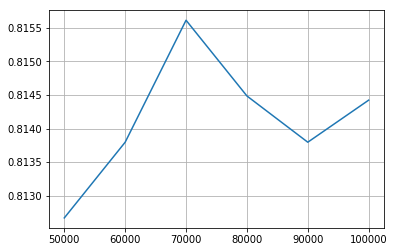

In [49]:
features_plot_with_tfidf_trigram_without_stopwords = pd.DataFrame(result_tfidf_trigram_without_stopwords,columns=['features','valid_accuracy','train_time'])
plt.plot(features_plot_with_tfidf_trigram_without_stopwords['features'],
         features_plot_with_tfidf_trigram_without_stopwords['valid_accuracy'],
         label = 'Without Stopwords')
plt.grid()
plt.show()

70000 features without stopwords removal and tfidf is the best accuracy for logistic regression

### Comparison of various Classification Algorithm

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#from catboost import Pool, CatBoostClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import MultinomialNB, BernoulliNB


In [ ]:
name = ["Logistic Regression",
       ]